# Example of use

In [1]:
import LMIPy

In [2]:
LMIPy.__version__

'0.1.19'

## Dataset objects

Using known id's you can instantiate a dataset object directly.

In [3]:
ds = LMIPy.Dataset('044f4af8-be72-4999-b7dd-13434fc4a394')
ds

Dataset 044f4af8-be72-4999-b7dd-13434fc4a394 Tree cover

You can access the attributes of a dataset.

In [4]:
ds.attributes

{'name': 'Tree cover',
 'slug': 'Tree-cover',
 'type': None,
 'subtitle': None,
 'application': ['gfw', 'gfw-pro'],
 'dataPath': None,
 'attributesPath': None,
 'connectorType': 'rest',
 'provider': 'gee',
 'userId': '596cde70824315350dd0f116',
 'connectorUrl': None,
 'tableName': 'UMD/hansen/global_forest_change_2013',
 'status': 'saved',
 'published': True,
 'overwrite': False,
 'verified': False,
 'blockchain': {},
 'mainDateField': None,
 'env': 'production',
 'geoInfo': False,
 'protected': True,
 'legend': {'date': [], 'region': [], 'country': [], 'nested': []},
 'clonedHost': {},
 'errorMessage': '[Automatic Validation] ConnectorFailed -> Invalid Dataset',
 'taskId': None,
 'updatedAt': '2018-11-21T13:55:01.210Z',
 'dataLastUpdated': None,
 'widget': [],
 'widgetRelevantProps': [],
 'layerRelevantProps': []}

You can also access the metadata and vocabularies if they exist.

In [5]:
ds.vocabulary[0].attributes

{'resource': {'id': '044f4af8-be72-4999-b7dd-13434fc4a394', 'type': 'dataset'},
 'tags': ['landCover'],
 'name': 'categoryTab',
 'application': 'gfw'}

In [6]:
ds.metadata[0].attributes

{'dataset': '044f4af8-be72-4999-b7dd-13434fc4a394',
 'application': 'gfw',
 'resource': {'id': '044f4af8-be72-4999-b7dd-13434fc4a394', 'type': 'dataset'},
 'language': 'en',
 'info': {'citation': '2000/2010, Hansen/UMD/Google/USGS/NASA',
  'color': '#a0c746',
  'description': 'Identifies areas of tree cover.',
  'isSelectorLayer': True,
  'name': 'Tree cover'},
 'createdAt': '2018-08-03T10:17:06.249Z',
 'updatedAt': '2018-11-06T15:57:49.716Z',
 'status': 'published'}

## Queries on Datasets

Datasets can be queried via SQL, with a table returned. Currently this is only supported for Carto-type data:

In [7]:
d = LMIPy.Dataset(id_hash='bd5d7924-611e-4302-9185-8054acb0b44b')
d

Dataset bd5d7924-611e-4302-9185-8054acb0b44b Global Mangrove Watch

In [8]:
d.query('SELECT fid, ST_ASGEOJSON(the_geom_webmercator) FROM data LIMIT 5')

,fid,st_asgeojson
0,0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6998..."
1,62,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6927..."
2,343,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6996..."
3,402,"{""type"":""MultiPolygon"",""coordinates"":[[[[-7004..."
4,682,"{""type"":""MultiPolygon"",""coordinates"":[[[[-6937..."


## Layer Objects

Similarly, you can also instantiate a Layer object.

In [9]:
ly = LMIPy.Layer(id_hash='dc6f6dd2-0718-4e41-81d2-109866bb9edd')
ly

Layer dc6f6dd2-0718-4e41-81d2-109866bb9edd Tree cover 2000

Layers can be visulized if appropriate via a call to Layer().map()

In [10]:
ly.map()

## Tables

Tables are subclasses of Dataset objects. They are document datasets which can be instantiated and queried returning a dataframe object.

In [11]:
t = LMIPy.Table(id_hash='86c7135a-855d-4f1b-9d67-f545a93281b3')
t

Table 86c7135a-855d-4f1b-9d67-f545a93281b3 AQ City Days (DUMMY, NOT FOR PUBLISH))

In [12]:
df = t.head(3)
df

,City,Number_of_Days,_id
0,Beijing,14,AWILuq8j8Jqrt1rp-STQ
1,San Francisco,10,AWILuq8j8Jqrt1rp-STT
2,Manama,7,AWILuq8j8Jqrt1rp-STU


Queries to tables are returned in geopandas dataframe format.

In [13]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [14]:
t.query("SELECT * from data where City = 'San Francisco'")

,City,Number_of_Days,_id
0,San Francisco,10,AWILuq8j8Jqrt1rp-STT


## Collection objects: Searching

If you don't know what data you are interested in advance, you can search by keywords and return a list of objects.

In [15]:
c = LMIPy.Collection('tree cover', object_type=['layer','dataset'], app=['gfw'], limit=10)

In [16]:
c

[0. Dataset f3fc0f1e-aa26-49b6-8741-45df2eea9ac2 Brazil Land Cover,
 1. Layer 220080ec-1641-489c-96c4-4885ed618bf3 Brazil land cover - 2000-2016,
 2. Layer 2f4d9b87-6629-4658-8175-87d7892a5f32 Earth Journalism Network Stories,
 3. Layer 66203fea-2e58-4a55-b222-1dae075cf95d FORMA alerts,
 4. Layer dd5df87f-39c2-4aeb-a462-3ef969b20b66 GLAD alerts,
 5. Layer a8b4e2eb-328e-420b-8027-8466271d8368 Geographic coverage,
 6. Table e663eb09-04de-4f39-b871-35c6c2ed10b5 Global Land Analysis and Discovery,
 7. Dataset 746089a3-0c24-402f-81b6-f8d91fab77fe Guatemala Forest Cover,
 8. Layer 2fe559f6-9ae7-4a47-87fb-a33a128652ed Guatemala forest change - 2001-2006,
 9. Layer cfd95864-1e95-4a7f-bdf8-e47e4bb5815e Guatemala forest cover - 2012]

Searching can be restricted with keyword arguments to specifically search types of items, applications, and more. If you want to render those items, you will need to do the following.

You can access items from a collection using subscripts, slices and more. Note that slicing, or selecting by element instantiates the Layer, Table, or Dataset object.

In [17]:
c[0:3]

[Dataset f3fc0f1e-aa26-49b6-8741-45df2eea9ac2 Brazil Land Cover,
 Layer 220080ec-1641-489c-96c4-4885ed618bf3 Brazil land cover - 2000-2016,
 Layer 2f4d9b87-6629-4658-8175-87d7892a5f32 Earth Journalism Network Stories]

In [18]:
c[-1]

Layer cfd95864-1e95-4a7f-bdf8-e47e4bb5815e Guatemala forest cover - 2012

In [19]:
c[-1].map()

## Create a Geometry object

Often you will need to perform some kind of intersect analysis between data held in datasets and tables and a geometry.
We will now show you multiple ways to create your geometry objects.

### From an ID

Vizzuality's API holds geometry objects as a Geostore item. Geostore items are accessed by an id-hash. If you know the hash of your object already you can simply call a geometry like so:

In [20]:
g = LMIPy.Geometry(id_hash='e8b6f974bcab5aefccd121654860be06')
g

Geometry e8b6f974bcab5aefccd121654860be06

### Geometry attributes

The attributes can be accessed as a dictionary.

In [21]:
g.attributes

{'geojson': {'features': [{'properties': None,
    'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-47.8535156249717, -4.19348629349041],
       [-49.6113281249728, -9.77447583284213],
       [-44.513671874972, -9.25438811084709],
       [-47.8535156249717, -4.19348629349041]]]}}],
  'crs': {},
  'type': 'FeatureCollection'},
 'hash': 'e8b6f974bcab5aefccd121654860be06',
 'provider': {},
 'areaHa': 16931274.241571266,
 'bbox': [-49.6113281249728,
  -9.77447583284213,
  -44.513671874972,
  -4.19348629349041],
 'lock': False,
 'info': {'use': {}}}

### Geometry as a Table

Table method returns a dataframe of the geometry object. Map will add a Folium map with the geomerty rendered.

In [22]:
g.table()

,areaHa,bbox,geometry,id,use
0,1.693127e+07,"[-49.6113281249728, -9.77447583284213, -44.513...","POLYGON ((-47.8535156249717 -4.19348629349041,...",e8b6f974bcab5aefccd121654860be06,{}


### Mapping the Geometry

Calling .map() will create a Folium map with the geomerty rendered.

In [23]:
g.map()

### From Geojson - Points

You can create an object as you need on the fly from geojson. The act of creating an object will also register it to a Geostore service of your choice (locally, or on a remote server). You can create a geometry object from geojson Points and MultiPoints type data as follows:

In [24]:
atts = {'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'MultiPoint', 'coordinates': [[-4.29, 39.1097]]}}]}}

point = LMIPy.Geometry(attributes=atts, server='https://production-api.globalforestwatch.org')
point

Geometry 08fcd7d990fe12a1077b68f2fdf8eb05

### From Geojson - Polygons

You can create an object as you need on the fly from geojson. The act of creating an object will also register it to a Geostore service of your choice (locally, or on a remote server).
You can create a geometry object from Geojson Polygon and Multipolygon type data as follows:

In [25]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[82.265625, 32.84267363195431],
       [77.34374999999999, 27.059125784374068],
       [85.4296875, 22.268764039073968],
       [90.3515625, 28.304380682962783],
       [87.5390625, 32.54681317351514],
       [82.265625, 32.84267363195431]]]}}]}}


g1 = LMIPy.Geometry(attributes=atts)
g1

Geometry 4dbc95a052c9c69e4d09fe72c359a207

In [26]:
g1.map()

### From a Shapely object

Shapely objects are at the root of popular python geolibraries such as Geopandas. We can recieve those geometry objects and create a Geometry object (simultaneously registering it in a Vizzuality Geostore server).

In [27]:
import geopandas as gpd

In [28]:
%%writefile ./sample.geojson
{"features":[{"properties":null,"type":"Feature","geometry":{"type":"Polygon","coordinates":[[[-43.1343734264374,-8.07358087603511],[-43.1327533721924,-8.08277985402466],[-43.1298887729645,-8.08181322762719],[-43.1103515625,-8.07815914647929],[-43.1094932556152,-8.07799981079283],[-43.1094932556152,-8.09641859926744],[-43.1103515625,-8.09645046495416],[-43.1187307834625,-8.0967372560211],[-43.1186878681183,-8.10273857778317],[-43.1186771392822,-8.10358831522616],[-43.1476235389709,-8.10358831522616],[-43.1477630138397,-8.10273857778317],[-43.1505310535431,-8.08645513764317],[-43.1517112255096,-8.08057041885644],[-43.1439757347107,-8.0795931648273],[-43.1448876857758,-8.07574785969913],[-43.1343734264374,-8.07358087603511]]]}}],"crs":{},"type":"FeatureCollection"}

Overwriting ./sample.geojson


In [29]:
df = gpd.read_file('./sample.geojson')
df

,geometry
0,POLYGON ((-43.1343734264374 -8.073580876035111...


Hello! 👋 I am a <class 'shapely.geometry.polygon.Polygon'>


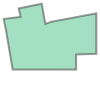

In [30]:
s = df.geometry[0]
print(f"Hello! 👋 I am a {type(s)}")
s

In [31]:
g = LMIPy.Geometry(s=s)

In [32]:
g

Geometry 52298e4ccc18b0f8375a156be6e18138

### From Political Boundaries

We are able to return political boundaries (based on [GADM](https://gadm.org/) data) using ISO, admin keys, down to admin-2 level. These should be passed in a dictionary to params. GADM 3.6 is currently used by default.

In [33]:
params={
    'iso': 'BRA',
    'adm1': None,
    'adm2': None
}
admin = LMIPy.Geometry(parameters=params)
admin.map()

### From an admin geometry with an older GADM version 

Alternatively, you can specify a different gadm version.

In [34]:

params={
    'iso': 'BRA',
    'adm1': 1,
    'adm2': 1,
    'gadm': '2.7'
}
admin_v1 = LMIPy.Geometry(parameters=params)
admin_v1.map()

### From a Carto table and index

You can also return geometries directly from a Carto table (under the public WRI-01 account) using the table name and cartodb_id.


In [35]:
params={
    'table': 'gfw_logging',
    'id': 123
}
row_geom = LMIPy.Geometry(parameters=params)
row_geom.map()

## Describe a Geometry 

Return a title and textual description of a geometry in any language.

In [36]:
g.map()

In [37]:
%%time
g.describe()

Title: Area in Piauí, Microrregião de São Raimundo Nonato
Description: Area of 1.14kha located in A lowland area. in Piauí. It is part of the Tropical and Subtropical Dry Broadleaf Forests biome. The area has a predominantly equatorial climate with dry winters. The region's habitat is comprised of Caatinga. This region has no Intact Forest.
CPU times: user 34.6 ms, sys: 3.27 ms, total: 37.8 ms
Wall time: 1.46 s


In [38]:
g.describe(lang='es') # same description but this time in Spanish

Title: Área en Piauí, Microrregión de São Raimundo Nonato
Description: Área de 1.14kha ubicada en una zona de tierras bajas. en piauí. Forma parte del bioma de los bosques de hoja ancha tropicales y subtropicales secos. El área tiene un clima predominantemente ecuatorial con inviernos secos. El hábitat de la región se compone de Caatinga. Esta región no tiene bosque intacto.


Second example of geodescriber, but considering a larger area.

In [39]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[82.265625, 32.84267363195431],
       [77.34374999999999, 27.059125784374068],
       [85.4296875, 22.268764039073968],
       [90.3515625, 28.304380682962783],
       [87.5390625, 32.54681317351514],
       [82.265625, 32.84267363195431]]]}}]}}


g2 = LMIPy.Geometry(attributes=atts)
g2

Geometry 4dbc95a052c9c69e4d09fe72c359a207

In [40]:
g2.map()

In [41]:
g2.describe()

Title: Area in Asia
Description: Area of 87.97Mha located in a mountainous area in Asia. The region is made up of several types of biomes, including Montane Grasslands and Shrublands, and Tropical and Subtropical Moist Broadleaf Forests. The most common environmental conditions of the area are polar tundra climate. The region is made up of different habitats, including Central Tibetan Plateau alpine steppe, and Upper Gangetic Plains moist deciduous forests. This region contains some Intact Forest.


After running describe, the results are avaiable as geometry.description

In [42]:
g2.description

{'title': 'Area in Asia',
 'description': 'Area of 87.97Mha located in a mountainous area in Asia. The region is made up of several types of biomes, including Montane Grasslands and Shrublands, and Tropical and Subtropical Moist Broadleaf Forests. The most common environmental conditions of the area are polar tundra climate. The region is made up of different habitats, including Central Tibetan Plateau alpine steppe, and Upper Gangetic Plains moist deciduous forests. This region contains some Intact Forest.',
 'lang': 'en'}

## Add a satellite image to the map of your Geometry

### Single images

The Geometry().map() method supports the return of recent satellite imagery. We calculate the centroid of your geometry and return the best, most recent image that intersects with that point. This is simply to provide context to your geometry. For point geometries we return the best cloud-free image we can find within a specified date range.

In [43]:
# Create a point

atts = {'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'MultiPoint', 'coordinates': [[-4.29, 39.1097]]}}]}}

point = LMIPy.Geometry(attributes=atts, server='https://production-api.globalforestwatch.org')
point

Geometry 08fcd7d990fe12a1077b68f2fdf8eb05

In [44]:
point.map(image=True)

### Composite images

Whereas for polygon-type geoms we return a cloud-free composite image clipped to your geometry.

In [45]:
# Create a polygon

atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-0.87890625, 43.329173667843904],
       [-1.6149902343749998, 42.75104599038353],
       [-1.1865234375, 42.35854391749705],
       [-0.6427001953125, 42.755079545072135],
       [-0.45043945312499994, 42.9524020856897],
       [-0.87890625, 43.329173667843904]]]}}]}}

g1 = LMIPy.Geometry(attributes=atts, server='https://production-api.globalforestwatch.org')
g1

Geometry f6726c97139f362ca9a10d70dc686375

In [46]:
g1.map(image=True, instrument='sentinel')

## Display a Layer and Geometry together

In [47]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-48.131103515625, -0.6001172008725418],
       [-48.13934326171875, -0.9791088369866402],
       [-47.86331176757812, -0.9818550168696459],
       [-47.616119384765625, -0.8459165322899671],
       [-47.50213623046875, -0.7182123915862891],
       [-47.51861572265625, -0.5287095375108173],
       [-47.882537841796875, -0.5163504323777461],
       [-48.131103515625, -0.6001172008725418]]]}}]}}
g = LMIPy.Geometry(attributes=atts)
l = LMIPy.Layer(id_hash='3ef039ba-29c7-459d-aadd-66d6e6cc8f5e')
l

Layer 3ef039ba-29c7-459d-aadd-66d6e6cc8f5e Aboveground mangrove biomass density - 2000

In [48]:
l.map(geometry=g)

## Intersecting Raster data with Geometry objects

Any Layer or Dataset objects based on an Earth Engine raster can be intersected with LMIPy.Geometry objects.

### Dataset Intersections
In the first instance we show the result of an intersect between a geometry roughly bounding London, and a Population density layer.

In [49]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [
          [
            [
              -0.5712890625,
              51.28940590271679
            ],
            [
              0.48339843749999994,
              51.28940590271679
            ],
            [
              0.48339843749999994,
              51.781435604431195
            ],
            [
              -0.5712890625,
              51.781435604431195
            ],
            [
              -0.5712890625,
              51.28940590271679
            ]
          ]
        ]}}]}}

g = LMIPy.Geometry(attributes=atts)


In [50]:
ds = LMIPy.Dataset(id_hash='a4e9c32d-d037-4c50-a893-967cad193537')
ds

Dataset a4e9c32d-d037-4c50-a893-967cad193537 Population Density

In [51]:
ds.layers[0].map(geometry=g)

Finally, you can call the intersect function on the dataset object to see a dictionary of values.

In [52]:
ds.intersect(geometry=g)

{'population-density': {'count': 138767,
  'max': 5984.53564453125,
  'mean': 1.5942131871343077,
  'min': 0.0,
  'stdev': 31.059972394495446,
  'sum': 221224.18133906648}}

### Layer Intersections

Intersections against layers work in the same manner. Here we show an intersect between an area along Brazil's coast and a Mangrove biomass density Layer.

In [53]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': 

[
          [
            [
              -52.16308593749999,
              -1.669685500986571
            ],
            [
              -46.9775390625,
              -1.669685500986571
            ],
            [
              -46.9775390625,
              0.7909904981540058
            ],
            [
              -52.16308593749999,
              0.7909904981540058
            ],
            [
              -52.16308593749999,
              -1.669685500986571
            ]
          ]
        ]
                 }}]}}

g = LMIPy.Geometry(attributes=atts)


In [54]:
ly = LMIPy.Layer('3ef039ba-29c7-459d-aadd-66d6e6cc8f5e')
ly

Layer 3ef039ba-29c7-459d-aadd-66d6e6cc8f5e Aboveground mangrove biomass density - 2000

In [55]:
ly.map(geometry=g)

In [56]:
ly.intersect(geometry=g)

{'b1': {'count': 135511,
  'max': 32.262001037597656,
  'mean': 2.341725882585996,
  'min': 0.5376999974250793,
  'stdev': 5.07816334797714,
  'sum': 302242.00477895216}}

## Construct Widgets GFW-style!

A demo of how to use LMIPy to construct widgets like those on the GFW Dashboard pages.

### Tree cover example

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Get a datatable (Hansen)
table = LMIPy.Table('a20e9c0e-8d7d-422f-90f5-3b9bca355aaf')
table

Table a20e9c0e-8d7d-422f-90f5-3b9bca355aaf country page data for admin level 2)

In [59]:
iso = 'BRA'
administration = 1

sql = f"""
        SELECT 
            SUM(area_extent) as value,
            SUM(area_admin) as total_area 
        FROM data 
        WHERE iso = '{iso}'
        AND adm1 = {administration}
        AND thresh = 30 
        AND polyname = 'admin'
"""

results = table.query(sql=sql)
results

,total_area,value
0,1.527330e+07,1.140593e+07


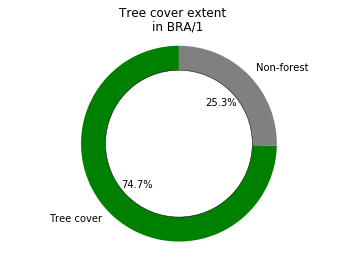

In [60]:
sizes = [results.value[0], results.total_area[0] - results.value[0]]
colors = ['green','grey']
labels = ['Tree cover', 'Non-forest']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0.5)
fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
plt.suptitle('Tree cover extent')
plt.title(f'in {iso}/{administration}')
plt.show()

### Tree cover loss example

In [61]:
sql = """
SELECT 
    polyname, year_data.year as year, 
    SUM(year_data.area_loss) as area

FROM data 
WHERE polyname = 'admin'
AND thresh= 30
GROUP BY polyname, iso, nested(year_data.year)
"""
global_loss = table.query(sql=sql)
global_loss.head()

,area,iso,polyname,year
0,2.746361e+06,BRA,admin,2001
1,3.507049e+06,BRA,admin,2002
2,3.248527e+06,BRA,admin,2003
3,3.848771e+06,BRA,admin,2004
4,3.486563e+06,BRA,admin,2005


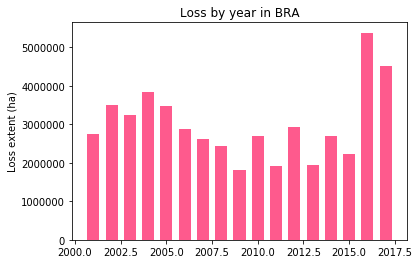

In [62]:
iso='BRA'
loss_data = list(global_loss[global_loss['iso'] == f'{iso}']['area'])
years = list(global_loss[global_loss['iso'] == f'{iso}']['year'])

width = 0.66
fig, ax = plt.subplots()
rects1 = ax.bar(years, loss_data, width, color='#FE5A8D')

# add some text for labels, title and axes ticks
ax.set_ylabel('Loss extent (ha)')
ax.set_title(f'Loss by year in {iso}')
plt.show()

## Creating a local backup of Data objects

Save a local backup of a collection to a specified path. This creates a folder containing a JSON for each dataset and it's associated Layers, Metadata and Vocabularies.

In [ ]:
col = LMIPy.Collection(app=['gfw'], env='production')

In [ ]:
path = './LMI-BACKUP'

In [ ]:
col.save(path)

## Load Data objects from local backup

You can also load a previous version from local backup.

In [ ]:
files = os.listdir(path)[0:3]
files

In [ ]:
ds_id = files[0].split('.json')[0]
ds_id

In [ ]:
dataset = LMIPy.Dataset(ds_id)

In [ ]:
dataset

In [ ]:
backup = dataset.load(path)

In [ ]:
backup